# Approximating roots of functions
We will use bisection, Newton's method and secant's method to approximate roots.

In [195]:
import math
import matplotlib.pyplot as plt
from mpmath import mp, mpf

mp.dps = 50

In [177]:
def f1(x): # [3/2 PI, 2PI]
    return mp.cos(x) * mp.cosh(x) - 1

def f2(x): # [0, PI/2]
    if x == 0: return 0
    return 1/x - mp.tan(x)

def f3(x): # [1, 3]
    return 2**(-x) + mp.exp(x) + 2 * mp.cos(x) - 6

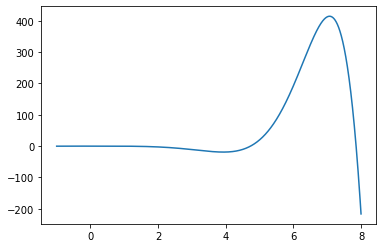

In [178]:
x = [0.001 * i for i in range(-1000, 8000)]
y = [f1(i) for i in x]

plt.plot(x, y)

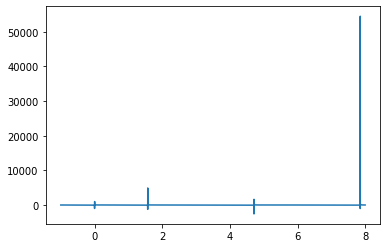

In [179]:
x = [0.001 * i for i in range(-1000, 8000)]
y = [f2(i) for i in x]

plt.plot(x, y)

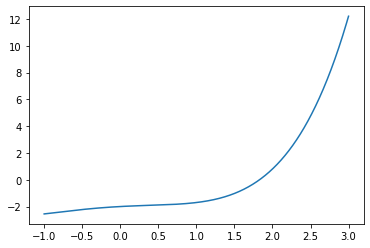

In [180]:
x = [0.001 * i for i in range(-1000, 3000)]
y = [f3(i) for i in x]

plt.plot(x, y)

## Bisection

In [181]:
# near zero 

def fun_mul_negative(fun, x1, x2):
    return (fun(x1) < 0 and fun(x2) > 0) or (fun(x1) > 0 and fun(x2) < 0)

In [189]:
def bisection_delta(fun, a, b, delta_a_b):
    
    mid = mpf( (a+b)/2 )
    iter_count = 0
    
    while abs(a - b) > delta_a_b:
        mid = mpf( (a+b)/2 )
        iter_count += 1
        if fun_mul_negative(fun, a, mid):
            b = mid
        
        else:
            a = mid
        
    return mid, iter_count

def bisection_epsilon(fun, a, b, epsilon):
    
    mid = mpf((a+b)/2)
    iter_count = 0
    
    while abs(fun(mid)) > epsilon:
        mid = (a+b)/2
        iter_count += 1
        if fun_mul_negative(fun, a, mid):
            b = mid
        
        else:
            a = mid
        
    return (a+b)/2, iter_count  

In [213]:
# f1
bisection_delta(f1, 3/2 * math.pi, 2 * math.pi, 1/mpf(10**49) )

(mpf('4.7300407448627040260240481008338848198983418007067849'), 164)

In [224]:
# f2
bisection_delta(f2, epsilon, math.pi/2, 1/mpf(10**32))

(mpf('0.86033358901937976248389342413765972892687343427382548'), 107)

In [192]:
# f3
bisection_delta(f3, 1, 3, 1/mpf(10**32))

(mpf('1.829383601933848817136212946814150233081591'), 108)

## Newton's method

In [214]:
def f1_der(x):
    return mp.cos(x) * mp.sinh(x) - mp.sin(x)*mp.cosh(x) 
def f2_der(x):
    return -1/x**2 - mp.sec(x)**2
def f3_der(x):
    return - 2**(-x) * mp.ln(x) + mp.exp(x) - 2 * mp.sin(x)

In [215]:
def newtons_method(fun, derivative_fun, x0, max_iter, epsilon):
    iter_count = 0
    diff = epsilon
    
    while iter_count < max_iter and diff >= epsilon:
        temp = x0
        x0 = x0 - fun(x0)/derivative_fun(x0)
        diff = abs(x0 - temp)
        iter_count += 1
        
    return x0, iter_count
        

In [225]:
# f1
newtons_method(f1, f1_der, 3/2 * math.pi, 200, 1/mpf(10**24) )

(mpf('4.7300407448627040260240481008338848198983418007068491'), 5)

In [226]:
# f2
newtons_method(f2, f2_der,  math.pi/2, 200, 1/mpf(10**49) )

(mpf('0.86033358901937976248389342413766233341188436323765412'), 61)

In [227]:
# f3
newtons_method(f3, f3_der, 1, 200, 1/mpf(10**49) )

(mpf('1.8293836019338488171362129468141507912940870105910678'), 27)

## Secant method

In [230]:
def seccant_method(fun, x_n, x_prev, epsilon):
    iter_count = 0
    diff = epsilon
    
    while diff >= epsilon:
        temp = x_n
        x_n = (fun(x_n)*x_prev - fun(x_prev)*x_n)/(fun(x_n) - fun(x_prev))
        x_prev = temp
        diff = abs(x_n - temp)
        iter_count += 1
        
    return x_n, iter_count

In [233]:
# f1
seccant_method(f1, 3/2 * math.pi, 2 * math.pi, 1/mpf(10**24) )

(mpf('4.7300407448627040260240481008338848198976623699013731'), 7)

In [234]:
# f2
seccant_method(f2, 0, math.pi/2, 1/mpf(10**24) )

(mpf('0.0'), 1)

In [235]:
# f3
seccant_method(f3, 1,3 , 1/mpf(10**24) )

(mpf('1.8293836019338488171362129468141507912940870105910678'), 13)